AdaBoost Evaluation
Accuracy : 0.9649122807017544
Precision: 0.958904109589041
Recall   : 0.9859154929577465
F1-Score : 0.9722222222222222

Confusion Matrix:
 [[40  3]
 [ 1 70]]

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

Cross-validation scores: [0.95614035 0.95614035 0.99122807 0.96491228 0.97345133]
Mean CV Accuracy: 0.9683744760130415

Single Tree Accuracy: 0.8947368421052632
AdaBoost Accuracy   : 0.9649122807017544


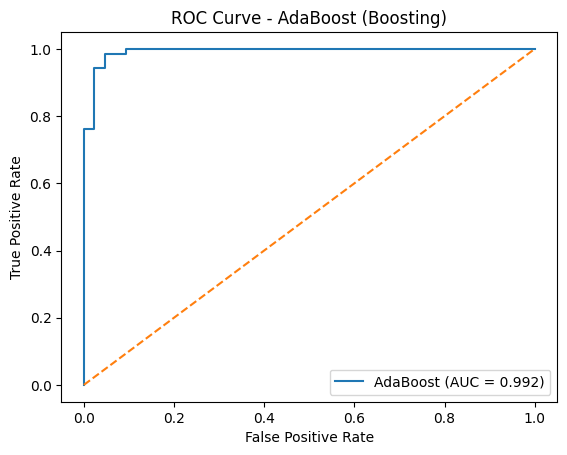

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_curve, roc_auc_score)
import matplotlib.pyplot as plt


X, y = load_breast_cancer(return_X_y=True)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


base_model = DecisionTreeClassifier(max_depth=1, random_state=42)


boost_model = AdaBoostClassifier(
    estimator=base_model,
    n_estimators=50,
    learning_rate=1.0,
    random_state=42
)


boost_model.fit(X_train, y_train)


y_pred = boost_model.predict(X_test)
y_prob = boost_model.predict_proba(X_test)[:, 1]


print("AdaBoost Evaluation")
print("Accuracy :", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall   :", recall_score(y_test, y_pred))
print("F1-Score :", f1_score(y_test, y_pred))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


cv_scores = cross_val_score(boost_model, X, y, cv=5, scoring='accuracy')
print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


single_model = DecisionTreeClassifier(max_depth=1, random_state=42)
single_model.fit(X_train, y_train)
single_pred = single_model.predict(X_test)

print("\nSingle Tree Accuracy:", accuracy_score(y_test, single_pred))
print("AdaBoost Accuracy   :", accuracy_score(y_test, y_pred))


fpr, tpr, _ = roc_curve(y_test, y_prob)
auc = roc_auc_score(y_test, y_prob)

plt.figure()
plt.plot(fpr, tpr, label=f"AdaBoost (AUC = {auc:.3f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - AdaBoost (Boosting)")
plt.legend()
plt.show()